<a href="https://colab.research.google.com/github/stork0101/DB2024/blob/main/%EC%8B%A4%EC%8A%B504_Analyzing_a_real_world_data_set_with_SQL_and_Python%3B%EC%8B%9C%EC%B9%B4%EA%B3%A0_%EC%82%AC%ED%9A%8C%EA%B2%BD%EC%A0%9C%EC%A7%80%ED%91%9C_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQL과 파이썬으로 실세계 데이터셋 분석하기

## 학습 목표

*   시카고의 선택된 사회경제적 지표에 대한 데이터셋 이해하기
*   데이터를 SQLite 데이터베이스에 저장하는 방법 배우기
*   예제 문제를 풀어보며 SQL 실력을 향상하기


## 시카고의 선택된 사회경제적 지표

시카고 시는 시카고 시 포털에 사회경제적 데이터셋을 공개했다. 이 데이터셋은 2008년부터 2012년까지 시카고의 각 지역사회에 대해 공중보건과 관련된 6가지 사회경제적 지표와 "hardship index(고난 지수)"를 포함하고 있다.

고난 지수의 점수는 1에서 100까지 범위로 나타나며, 지수 숫자가 높을수록 더 큰 고난 수준을 나타낸다.

데이터셋에 대한 자세한 설명은 [시카고 시 웹사이트](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01)에서 확인할 수 있지만, 요약하자면, 데이터셋에는 다음과 같은 변수들이 포함되어 있다:

*   **Community Area Number** (`ca`): 데이터셋의 각 행을 고유하게 식별하는 데 사용

*   **Community Area Name** (`community_area_name`): 시카고 시의 지역 이름

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): 한 방에 한 사람 이상 거주하는 주택 비율

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): 연방 빈곤선(federal poverty line) 이하에 거주하는 가구 비율

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): 16세 이상 인구 중 실업자 비율

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): 25세 이상 인구 중 고등학교 교육을 받지 않은 비율

*   **Percent Aged Under** 18 or Over 64:18세 미만 또는 64세 이상 인구 비율 (즉, 부양자) (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): 지역사회의 1인당 소득은 구역별 총 소득을 총 인구로 나눈 값으로 추정

*   **Hardship Index** (`hardship_index`): 선택된 6가지 사회경제적 지표를 통합하여 계산된 점수

이번 실습에서는 사회경제적 지표 데이터셋의 변수를 살펴보고 Python을 사용하여 기본적인 분석을 수행해보자.


### 데이터베이스에 연결

먼저 SQL extension을 로드하고 데이터베이스와의 연결을 설정하자.

##### SQLite를 사용하여 magic SQL에 연결하는 구문은 다음과 같다:

  **%sql sqlite://DatabaseName**   
  
여기서 DatabaseName은 여러분의 **.db** 파일이 된다.

In [3]:
%load_ext sql

In [4]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
!pip install -q pandas==1.1.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 41.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pandas (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pandas
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pandas)


In [7]:
%sql sqlite:///socioeconomic.db

### 데이터셋을 테이블에 저장하기

##### 많은 경우 분석할 데이터셋은 .CSV(comma separated values) 파일로 제공되며, 인터넷에서 찾는 경우가 많다. SQL을 사용하여 데이터를 분석하려면 먼저 데이터를 데이터베이스에 저장해야 한다.

##### 먼저 주어진 URL에서 CSV 파일을 읽어 pandas 데이터프레임으로 변환하자.

##### 그 다음 `df.to_sql()` 함수를 사용하여 각 CSV 파일을 SQLite의 테이블로 변환하고, 그 안에 CSV 데이터를 로드하자.


In [5]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")

78

In [6]:
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

##### 테이블 생성이 성공했는지 확인하려면 다음과 같은 기본 쿼리를 실행할 수 있다:


In [8]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Problem

### Problem 1

##### 데이터셋에 몇 개의 행이 있는가?


In [9]:
# @@@@@ 여기에 코드를 작성하세요. @@@@@
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


### Problem 2

##### 시카고에서 고난 지수(hardship index)가 50.0을 초과하는 지역사회는 몇 개인가?


In [10]:
# @@@@@ 여기에 코드를 작성하세요. @@@@@
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index >50.0

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


### Problem 3

##### 이 데이터셋에서 고난 지수(hardship index)의 최대값은 얼마인가?


In [11]:
# @@@@@ 여기에 코드를 작성하세요. @@@@@
%sql SELECT Max(hardship_index) FROM chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


Max(hardship_index)
98.0


### Problem 4

##### 가장 높은 고난 지수(hardship index)를 가진 지역사회는 어디인가?

In [14]:
# @@@@@ 여기에 코드를 작성하세요. @@@@@
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC LImIT 1;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


### Problem 5

##### 1인당 소득이 $60,000을 초과하는 시카고의 지역사회는 어디인가?

In [15]:
# @@@@@ 여기에 코드를 작성하세요. @@@@@
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_>60000

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


### Problem 6

##### per_capita_income_와 hardship_index 변수를 사용하여 산점도를 생성하시오. 두 변수 간의 상관관계(correlation)를 설명하시오.


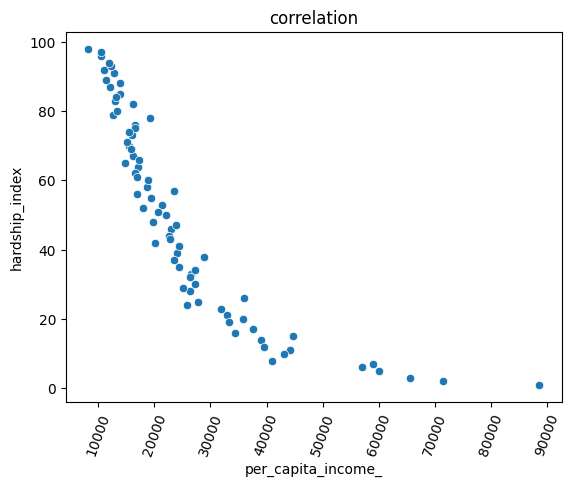

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# @@@@@ 여기에 코드를 작성하세요. @@@@@


plot = sns.scatterplot(x="per_capita_income_", y="hardship_index", data=df)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('correlation')
plt.show()

### 결론

##### 이제 SQL과 Python 시각화 도구를 사용하여 기본적인 탐색적 데이터 분석을 수행하는 방법을 알게 되었으니, 이 데이터셋을 더 깊이 탐구하여 `per_capita_income_` 변수가 `percent_households_below_poverty` 및 `percent_aged_16_unemployed`와 어떻게 관련이 있는지 확인해보자. 시각화를 시도해보길 추천한다.


## Summary

##### 이번 실습에서는 인터넷에서 실제 데이터를 데이터베이스에 저장하고, SQL 쿼리를 통해 데이터에 대한 통찰을 얻는 방법을 배웠다. 또한 데이터베이스의 일부 데이터를 시각화하여 데이터가 어떤 이야기를 하는지 살펴보았다.